# Python lab: analysis and visualization of data from an Argo float

#### By Daniel Tetteh Quaye



## Content:

- Loading multiple files from a folder
- Extracting data from multiple files: loop and conditional statements
- Plotting positions on a map
- Adding features to a map
- Manipulating data
- Scaling position data by a variable
- Practice challenge (clues are provided)


### In this lab, you will work with observational data from the BGC-Argo float, Vinci_Voyager_2. The float was deployed in the South Atlantic Ocean off the coast of Angola in 2021

In [26]:
#Import required modules

from pathlib import Path                     #needed to easily handle file paths
import os                                    #needed to interact with the operating system (OS)
from glob import glob                        #needed to retrieve all data files from the data folder
import matplotlib.pyplot as plt              #needed for plotting data
import cartopy.crs as ccrs                   #needed to provide a coordinate reference system/map projection
import cartopy.feature as cfeature           #needed to add different map features
import numpy as np                          
import pandas as pd

In [2]:
#print your current working directory
os.getcwd()                     #important if you decide to save the notebook on your local computer for later use                              

'C:\\Users\\nuno.vieira\\Downloads\\Daniel\\BGC_ARGO\\coessing2022-hub'

### Let's load in the data files (profiles) generated by the float

In [3]:
#Define path to files
file_path = Path("~/Downloads/Daniel/BGC_ARGO/coessing2022-hub/Argo_data").expanduser()
#print(file_path)
os.chdir(file_path)                          #change directory to the data folder to allow for easy
                                             #retrieval of folder content
file_name_list = glob("*.csv")               #retrieve the data files matching the specified pattern
file_name_list = sorted(file_name_list)      #sort the file names in ascending order of date created
print(file_name_list)

['sbuuse001b_007_01.csv', 'sbuuse001b_008_01.csv', 'sbuuse001b_009_01.csv', 'sbuuse001b_009_02.csv', 'sbuuse001b_009_03.csv', 'sbuuse001b_010_01.csv', 'sbuuse001b_010_02.csv', 'sbuuse001b_010_03.csv', 'sbuuse001b_011_01.csv', 'sbuuse001b_011_02.csv', 'sbuuse001b_011_03.csv', 'sbuuse001b_012_01.csv', 'sbuuse001b_012_02.csv', 'sbuuse001b_012_03.csv', 'sbuuse001b_013_01.csv', 'sbuuse001b_013_02.csv', 'sbuuse001b_013_03.csv', 'sbuuse001b_014_01.csv', 'sbuuse001b_014_02.csv', 'sbuuse001b_014_03.csv', 'sbuuse001b_015_01.csv', 'sbuuse001b_015_02.csv', 'sbuuse001b_015_03.csv']


### Time to extract some data

In [4]:
# we need to first create a storage for the extracted data!

lat_list = []                                #create an empty list to hold the latitude data
lon_list = []                                #create an empty list to hold the longitude data

#### We will make use of loop and conditional statements here

In [5]:
#Loop through list of files to extract the data
for file_name in file_name_list:
    print("Working on this file: " + file_name)

    full_file_path = file_path / file_name
                                            
    data_file = open(full_file_path, 'r')    #define an object to hold each data file in memory
    #print(data_file)

    counter = 0                              #set a counter to be used in easily dealing with header

    for line in data_file:
        line = line.strip()                  #use strip() to remove line feed (or line break- a character symbol)
                                             #at the end of each line
        if counter == 0:
            print(line)
        else:
            element = line.split('\t')       #for each line, split it where the text is separated by a tab
                                             #character and assigning the list of elements to an object
            #print(line)

            lat = element[2]                 #index the latitude data and assign it to an object
            #use an if statement to deal with missing values
            if lat != 'NA':
                lat = float(lat)             #convert latitude info into a float
                lat_list.append(lat)         #attach the latitude info to the lat_list created earlier

            lon = element[3]                 #index the longitude data and assign it to an object
            #use an if statement to deal with missing values
            if lon != 'NA':
                lon = float(lon)             #convert longitude info into a float
                lon_list.append(lon)         #attach the longitude info to the long_list

        counter = counter + 1                #increase counter after printing the header to allow access to the
                                             #actual data in each variable

    data_file.close()                        #close each file after extracting data for next file to be worked on

Working on this file: sbuuse001b_007_01.csv
Pressure_dbar	Date	lat_deg	lon_deg	CycleNumber	PatternNumber	PhaseName	SensorType	processing	Temperature_degC	Salinity_PSU	c1phase_deg	c2phase_deg	tempdoxy_degC	doxy_uncalibrated	chlorophyll-a_CN	beta-theta_CN	chlorophyll-a_ug/l	beta-theta_1/msr	NSamples	UVP6_Temp	NP_Size_40.3	NP_Size_50.8	NP_Size_64	NP_Size_80.6	NP_Size_102	NP_Size_128	NP_Size_161	NP_Size_203	NP_Size_256	NP_Size_323	NP_Size_406	NP_Size_512	NP_Size_645	NP_Size_813	NP_Size_1020	NP_Size_1290	NP_Size_1630	NP_Size_2050	MG_Size_40.3	MG_Size_50.8	MG_Size_64	MG_Size_80.6	MG_Size_102	MG_Size_128	MG_Size_161	MG_Size_203	MG_Size_256	MG_Size_323	MG_Size_406	MG_Size_512	MG_Size_645	MG_Size_813	MG_Size_1020	MG_Size_1290	MG_Size_1630	MG_Size_2050	uvp-blk_Internal_temp	uvp-blk_Count1	uvp-blk_Count2	uvp-blk_Count3	uvp-blk_Count4	uvp-blk_Count5
Working on this file: sbuuse001b_008_01.csv
Pressure_dbar	Date	lat_deg	lon_deg	CycleNumber	PatternNumber	PhaseName	SensorType	processing	Temperature_d

Pressure_dbar	Date	lat_deg	lon_deg	CycleNumber	PatternNumber	PhaseName	SensorType	processing	Temperature_degC	Salinity_PSU	c1phase_deg	c2phase_deg	tempdoxy_degC	doxy_uncalibrated	chlorophyll-a_CN	beta-theta_CN	chlorophyll-a_ug/l	beta-theta_1/msr	NSamples	UVP6_Temp	NP_Size_40.3	NP_Size_50.8	NP_Size_64	NP_Size_80.6	NP_Size_102	NP_Size_128	NP_Size_161	NP_Size_203	NP_Size_256	NP_Size_323	NP_Size_406	NP_Size_512	NP_Size_645	NP_Size_813	NP_Size_1020	NP_Size_1290	NP_Size_1630	NP_Size_2050	MG_Size_40.3	MG_Size_50.8	MG_Size_64	MG_Size_80.6	MG_Size_102	MG_Size_128	MG_Size_161	MG_Size_203	MG_Size_256	MG_Size_323	MG_Size_406	MG_Size_512	MG_Size_645	MG_Size_813	MG_Size_1020	MG_Size_1290	MG_Size_1630	MG_Size_2050	uvp-blk_Internal_temp	uvp-blk_Count1	uvp-blk_Count2	uvp-blk_Count3	uvp-blk_Count4	uvp-blk_Count5
Working on this file: sbuuse001b_013_01.csv
Pressure_dbar	Date	lat_deg	lon_deg	CycleNumber	PatternNumber	PhaseName	SensorType	processing	Temperature_degC	Salinity_PSU	c1phase_deg	c2phase_deg	tem

#### Let's take a look at the data we have just extracted

In [6]:
#Print the extracted data
print(lat_list)
print(lon_list)

[-10.9920893333333, -10.9774073333333, -10.961809, -11.2584191666667, -11.3894453333333, -11.5725121666667, -11.7220513333333, -11.7810655, -11.9603623333333, -11.9205458333333, -11.8376956666667, -11.780243, -11.9480951666667, -11.9095716666667, -11.8949303333333, -11.9126791666667, -11.9714391666667, -12.1077886666667, -12.0534186666667, -12.2798216666667, -12.5781406666667, -12.7731451666667, -12.9225515]
[12.7299241666667, 12.7073118333333, 12.6798685, 12.6583755, 12.5797536666667, 12.5939666666667, 12.2326848333333, 12.1177765, 12.0714973333333, 11.735906, 11.6983251666667, 11.7003561666667, 11.6471633333333, 11.5598145, 11.5490728333333, 11.5117351666667, 11.4545658333333, 11.4406403333333, 11.3647411666667, 11.3707713333333, 11.380208, 11.0370595, 11.0638891666667]


#### We now have information on the float position anytime it ascended to the ocean surface to transmit data

### Plotting time

#### We will plot the location data we extracted on a map, so we know exactly where in the world the float was.

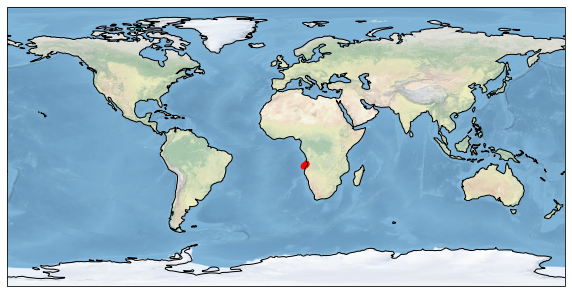

In [7]:
fig = plt.figure(figsize=(10,7))                 #define a figure size  
ax = plt.axes(projection=ccrs.PlateCarree())     #create an axis with a specified map projection 

ax.coastlines()                                  #add coastlines to the map
ax.stock_img() 
#add land and ocean feature
#Plot float positions on a map
plt.scatter(lon_list, lat_list,
         color='red', s=20,
         transform=ccrs.PlateCarree(),
         )

#### Unfortunately we don't see much  (°_°) . We need to zoom into the area by limiting the map extent.

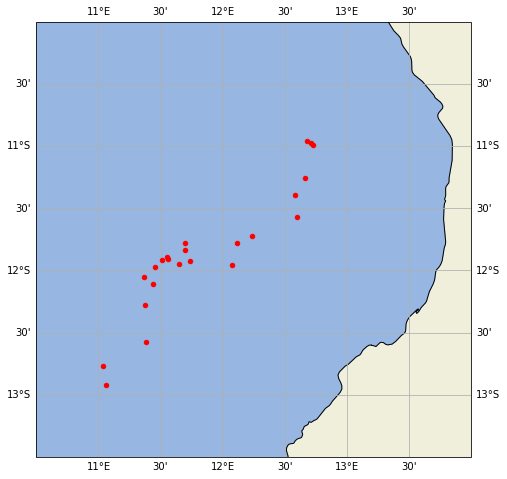

In [8]:
fig = plt.figure(figsize=(8,8))                     #define a figure size               
ax = plt.axes(projection=ccrs.PlateCarree())        #create an axis with a specified map projection         

ax.coastlines()                                     #add coastlines to the map
ax.add_feature(cfeature.LAND)                       #add land feature to the map
ax.add_feature(cfeature.OCEAN)                      #add ocean feature to the map

plt.scatter(lon_list, lat_list,
         color='red', s=20,
         transform=ccrs.PlateCarree(), zorder = 3,
         )

#define the latitude and longitude extent of the map (West, East, South, North)
ax.set_extent([10.5, 14, -13.5, -10], crs=ccrs.PlateCarree())

#add gridlines to the map
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

#### Let us now figure out in which direction the float is moving

In [9]:
start_lat = lat_list[0]                   #assign initial latitude info of the float position to an object
start_lon = lon_list[0]                   #assign initial longitude info of the float position to an object

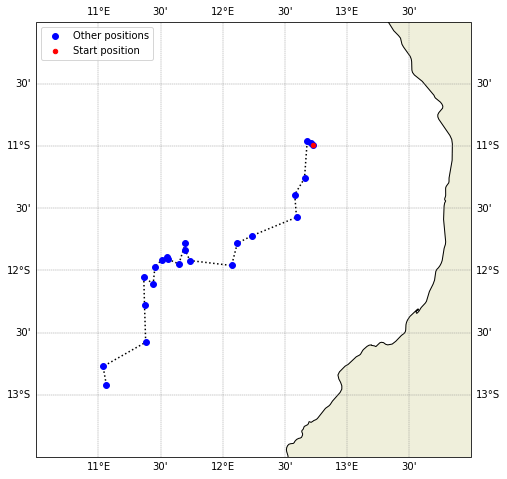

In [10]:
#Plot the float position and trajectory on a map
fig = plt.figure(figsize=(8,8))                     # define a figure size

ax = plt.axes(projection=ccrs.PlateCarree())        # create an axis with a specified map projection 

ax.coastlines()                                     #add coastlines to the map
ax.add_feature(cfeature.LAND)                       #add land feature to the map

#generate a scatter plot with the data
plt.scatter(lon_list, lat_list,
            color='b', s=35,
           transform=ccrs.PlateCarree(), zorder=3, label = "Other positions")

#mark the starting point of the profiles
plt.scatter(start_lon, start_lat, color ='r', s=20, zorder=4, label= "Start position")

#add the float trajectory
ax.plot(lon_list, lat_list, 'k:')          #overlaying a second plot on the first. this code links points by
                                           #dotted black lines ('k:'). k is line colour, : is the line shape

#define the latitude and longitude extent of the map (West, East, South, North)
ax.set_extent([10.5, 14, -13.5, -10], crs=ccrs.PlateCarree())

#add gridlines to the map
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'gray', linestyle = 'dashed', linewidth = 0.4)

#add a legend to show the starting position of the float
plt.legend(loc ="upper left")

### Practice challenge!

##### Generate a plot similar to the one above but with colours for the 'Start' and 'Other positions'. Clue: Copy and paste the above code in a new cell. Replace the value of the color argument with a colour name. List of colour names can be found here - [colours](https://matplotlib.org/stable/gallery/color/named_colors.html)

#### Let´s now take a dive with the float and see how deep it takes us before bringing us up to the surface each time

In [11]:
max_depth_list = []                         #create an empty list to hold the maximum descent depth data

In [12]:
#Loop through the list of files to extract the data
for file_name in file_name_list:
    print("Working on this file: " + file_name)

    full_file_path = file_path / file_name

    data_file = open(full_file_path, 'r')
    #print(data_file)

    depth_list = []                         #an empty list to hold depth data of each file and from which
                                            #the maximum descent depth value will be computed

    counter = 0                             

    for line in data_file:
        line = line.strip()                 
                                            
        if counter == 0:
            line;
        else:
            element = line.split('\t')      
                                            

            depth = element[0]              
            depth = float(depth)            
            depth_list.append(depth)        

        counter = counter + 1               
                                           
    max_depth = np.max(depth_list)          #retrieve maximum descent depth value from the depth_list of each file
    max_depth_list.append(max_depth)        #attach the this maximum value to the max_depth_list

    data_file.close()                      

Working on this file: sbuuse001b_007_01.csv
Working on this file: sbuuse001b_008_01.csv
Working on this file: sbuuse001b_009_01.csv
Working on this file: sbuuse001b_009_02.csv
Working on this file: sbuuse001b_009_03.csv
Working on this file: sbuuse001b_010_01.csv
Working on this file: sbuuse001b_010_02.csv
Working on this file: sbuuse001b_010_03.csv
Working on this file: sbuuse001b_011_01.csv
Working on this file: sbuuse001b_011_02.csv
Working on this file: sbuuse001b_011_03.csv
Working on this file: sbuuse001b_012_01.csv
Working on this file: sbuuse001b_012_02.csv
Working on this file: sbuuse001b_012_03.csv
Working on this file: sbuuse001b_013_01.csv
Working on this file: sbuuse001b_013_02.csv
Working on this file: sbuuse001b_013_03.csv
Working on this file: sbuuse001b_014_01.csv
Working on this file: sbuuse001b_014_02.csv
Working on this file: sbuuse001b_014_03.csv
Working on this file: sbuuse001b_015_01.csv
Working on this file: sbuuse001b_015_02.csv
Working on this file: sbuuse001b

In [13]:
#Print the extracted data
print(max_depth_list)

[989.2, 991.22, 991.98, 984.6, 1397.6, 1387.7, 998.5, 1385.1, 1395.2, 1009.4, 1393.3, 1396.0, 1019.2, 1391.9, 1408.1, 986.4, 1387.6, 1387.0, 985.3, 980.8, 1995.5, 993.3, 988.7]


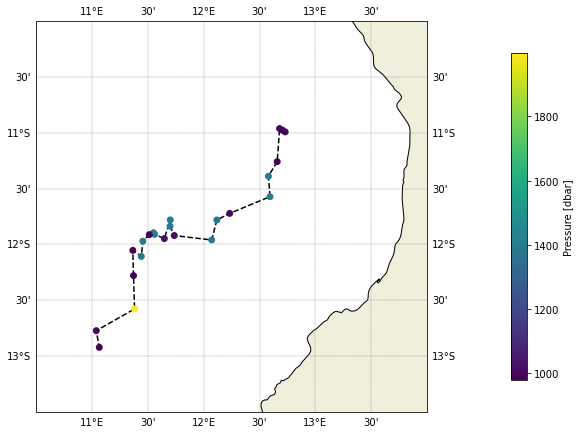

In [14]:
#Plot float trajectory and show maximum descent depth
fig = plt.figure(figsize=(10,10))             

ax = plt.axes(projection=ccrs.PlateCarree())        

ax.coastlines()             
ax.add_feature(cfeature.LAND)               

plt.scatter(lon_list, lat_list,
            c=max_depth_list, s=35,
           transform=ccrs.PlateCarree(), zorder=4)


ax.plot(lon_list, lat_list, 'k--')          
                                            

#add a colour bar
cbar = plt.colorbar(pad=0.15, shrink=0.6)
cbar.set_label('Pressure [dbar]')

ax.set_extent([10.5, 14, -13.5, -10], crs=ccrs.PlateCarree())

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
             color = 'gray', linestyle = 'dashed', linewidth = 0.4)
plt.show()

#### Improve the appearance of the plot

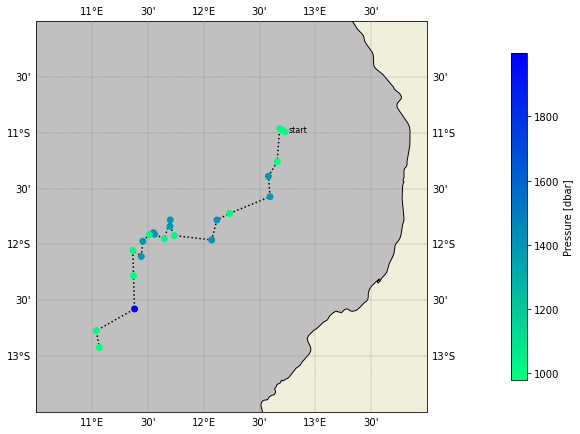

In [15]:
#Plot float trajectory and show maximum descent depth
fig = plt.figure(figsize=(10,10))             

ax = plt.axes(projection=ccrs.PlateCarree())        

ax.coastlines()             
ax.add_feature(cfeature.LAND)               

plt.scatter(lon_list, lat_list,
            c=max_depth_list, s=35, 
            cmap= 'winter_r',             #change default colour
            transform=ccrs.PlateCarree(), zorder = 4)

ax.plot(lon_list, lat_list, 'k:')          

#mark the starting point of the profiles
plt.text(start_lon + 0.03, start_lat, 'start', fontsize = 8)

plt.colorbar(label = 'Pressure [dbar]', pad=0.15, shrink=0.6)

#change the default plot background to a colour that favours contrast between the points
ax.set_facecolor("silver")

ax.set_extent([10.5, 14, -13.5, -10], crs=ccrs.PlateCarree())

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
             color = 'grey', linestyle = 'dashed', linewidth = 0.4, zorder = 3)

#### As seen in the profiles, the float collects data on many variables including temperature, salinity, dissolved oxygen and chlorophyll-a. Let us plot one of these variables on a map. The selected variable is chlorophyll-a 

In [16]:
mean_surface_chla_list = []                 #create an empty list to hold mean surface chlorophyll data

In [17]:
for file_name in file_name_list:
    print("Working on this file: " + file_name)

    full_file_path = file_path / file_name

    data_file = open(full_file_path, 'r')
    #print(data_file)

    surface_chla_list = []                         #an empty list to hold chlorophyll-a data in each file and from which
                                                   #the mean chlorophyll-a value will be computed
    counter = 0                                    

    for line in data_file:
        line = line.strip()                
                                           
        if counter == 0:
            line;
        else:
            element = line.split('\t')      

            depth = element[0]              
            chla = element[17]             
            #print(depth, chla)

            #use an if statement to deal with missing values
            if len(chla) == 2:
                chla = np.nan
            chla = float(chla)              

            depth = float(depth)            
            #use a condition to limit the chlorophyll-a values being retrieved so you can have data
            #corresponding to surface waters only (0-100)
            if depth <= 100:
                surface_chla_list.append(chla)            #attach the chla info to the surface chlorophyll-a list

        counter = counter + 1                      

    mean_surface_chla = np.nanmean(surface_chla_list)     #calculate the mean chlorophyll-a and assign to an object
    mean_surface_chla_list.append(mean_surface_chla)      #append this value to the appropriate list

    data_file.close()                      

Working on this file: sbuuse001b_007_01.csv
Working on this file: sbuuse001b_008_01.csv
Working on this file: sbuuse001b_009_01.csv
Working on this file: sbuuse001b_009_02.csv
Working on this file: sbuuse001b_009_03.csv
Working on this file: sbuuse001b_010_01.csv
Working on this file: sbuuse001b_010_02.csv
Working on this file: sbuuse001b_010_03.csv
Working on this file: sbuuse001b_011_01.csv
Working on this file: sbuuse001b_011_02.csv
Working on this file: sbuuse001b_011_03.csv
Working on this file: sbuuse001b_012_01.csv
Working on this file: sbuuse001b_012_02.csv
Working on this file: sbuuse001b_012_03.csv
Working on this file: sbuuse001b_013_01.csv
Working on this file: sbuuse001b_013_02.csv
Working on this file: sbuuse001b_013_03.csv
Working on this file: sbuuse001b_014_01.csv
Working on this file: sbuuse001b_014_02.csv
Working on this file: sbuuse001b_014_03.csv
Working on this file: sbuuse001b_015_01.csv
Working on this file: sbuuse001b_015_02.csv
Working on this file: sbuuse001b

In [18]:
surface_chla_list [ :8]

[nan, nan, nan, 0.0438, nan, nan, nan, 0.0438]

In [19]:
mean_surface_chla_list [ :8]

[0.2903094736842105,
 0.3024622119815668,
 0.2971510822510822,
 0.4901735294117647,
 0.3214269430051813,
 0.28586926406926405,
 0.303093137254902,
 0.2991118556701031]

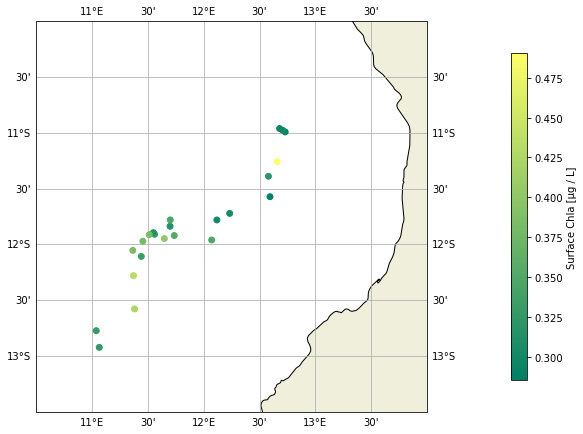

In [20]:
#Plot the mean surface chlorophyll- a data on a map
fig = plt.figure(figsize=(10,10))             #define a standard figure size
ax = plt.axes(projection=ccrs.PlateCarree())        #open a map with a specified projection

ax.coastlines()             #add coastlines to the map
ax.add_feature(cfeature.LAND)               #add land feature to the map

#generate a scatter plot with the data
plt.scatter(lon_list, lat_list,
         c=mean_surface_chla_list, s=35,
         transform=ccrs.PlateCarree(), zorder=3, cmap='summer')

#add a colour bar
plt.colorbar(orientation = 'vertical', pad=0.15, shrink=0.6, label = 'Surface Chla [µg / L]')
#define the latitude and longitude extent of the map (West, East, South, North)
ax.set_extent([10.5, 14, -13.5, -10], crs=ccrs.PlateCarree())
#add gridlines to the map
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder = 2)

### Practice challenge!

##### Generate a map similar to the one above but with temperature or salinity as the selected variable. Clue: index position for temperature and salinity are 9 and 10 respectively. Be sure to use an appropriate colormaps. Colour maps can be found here - [colourmaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

### Extra content!

#### Working with a single profile

In [21]:
#Create the file name
data_file = "sbuuse001b_007_01.csv"        #assign file to an object
data_file                                  #print file name

'sbuuse001b_007_01.csv'

#### OR

In [22]:
data_file = file_name_list[0]              
data_file

'sbuuse001b_007_01.csv'

In [23]:
#path to selected data file
full_path_to_file = file_path / data_file
full_path_to_file                      #print full path to file. A check point to see correct path in full

WindowsPath('C:/Users/nuno.vieira/Downloads/Daniel/BGC_ARGO/coessing2022-hub/Argo_data/sbuuse001b_007_01.csv')

In [27]:
#file does not open properly without the argument - 'encoding'
profile_1 = pd.read_csv(full_path_to_file, sep='\t', encoding='utf-8') 

In [28]:
profile_1.head()

,Pressure_dbar,Date,lat_deg,lon_deg,CycleNumber,PatternNumber,PhaseName,SensorType,processing,Temperature_degC,...,MG_Size_1020,MG_Size_1290,MG_Size_1630,MG_Size_2050,uvp-blk_Internal_temp,uvp-blk_Count1,uvp-blk_Count2,uvp-blk_Count3,uvp-blk_Count4,uvp-blk_Count5
0,973.23,2021-05-04 21:02:04,NaN,NaN,7,1,PAR,0.0,(RW),4.3658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,973.20,2021-05-04 21:02:04,NaN,NaN,7,1,PAR,3.0,(RW),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,973.20,2021-05-04 21:02:06,NaN,NaN,7,1,PAR,9.0,(RW),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,973.20,2021-05-04 21:02:10,NaN,NaN,7,1,PAR,110.0,(RW),NaN,...,NaN,NaN,NaN,NaN,4.88,0.0,0.0,0.0,123.0,0.0
4,973.20,2021-05-04 21:02:59,NaN,NaN,7,1,PAR,109.0,(RW),NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# iterating over the column names
for col in profile_1.columns:
    print(col)

Pressure_dbar
Date
lat_deg
lon_deg
CycleNumber
PatternNumber
PhaseName
SensorType
processing
Temperature_degC
Salinity_PSU
c1phase_deg
c2phase_deg
tempdoxy_degC
doxy_uncalibrated
chlorophyll-a_CN
beta-theta_CN
chlorophyll-a_ug/l
beta-theta_1/msr
NSamples
UVP6_Temp
NP_Size_40.3
NP_Size_50.8
NP_Size_64
NP_Size_80.6
NP_Size_102
NP_Size_128
NP_Size_161
NP_Size_203
NP_Size_256
NP_Size_323
NP_Size_406
NP_Size_512
NP_Size_645
NP_Size_813
NP_Size_1020
NP_Size_1290
NP_Size_1630
NP_Size_2050
MG_Size_40.3
MG_Size_50.8
MG_Size_64
MG_Size_80.6
MG_Size_102
MG_Size_128
MG_Size_161
MG_Size_203
MG_Size_256
MG_Size_323
MG_Size_406
MG_Size_512
MG_Size_645
MG_Size_813
MG_Size_1020
MG_Size_1290
MG_Size_1630
MG_Size_2050
uvp-blk_Internal_temp
uvp-blk_Count1
uvp-blk_Count2
uvp-blk_Count3
uvp-blk_Count4
uvp-blk_Count5


In [30]:
variables_list = profile_1.columns.values.tolist()
variables_list;

### Good job! This is the end! Don't forget to practice!